# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [20]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1. What test is appropriate for this problem? Does CLT apply?
2. What are the null and alternate hypotheses?

1 . **A/B Testing** is a good test for this problem, as we are testing just two different outcomes: *callback* and *no callback*

The **Central Limit Theorem** states that the distribution of a sample mean becomes normal when the sample size is large. The distribution of sample means of callbacks by race from the dataset, will then, be approximately normal with a large enough number of sample means.  This can be acheived in Python and numpy by taking the mean of permutation replicates, created by resampling the dataset.



2. 

The **null hypothesis** is that race of applicant (represented in the data as 'black-sounding name' vs. 'white-sounding name') has no bearing on callback.  The **alternative hypothesis** is that race of applicant *does* influence callback rates. 

<div class="span5 alert alert-success">

<p> Your solution to Q3 here </p>
</div>

3. Compute **margin of error**, **confidence interval**, and **p-value**. Try using both the bootstrapping and the frequentist statistical approaches.

The sample proportion can be used to estimate a confidence interval.

The sample proportion is the number of successes in the sample divided by the number of samples: $$\hat{p}= \frac{x}{n} $$ This is calculated below for the the data where the race of the applicant is black.

In [74]:
b = data[data['race'] == 'b']
b.head()
b_callbacks = b['call'].value_counts()
print (b_callbacks)
b_successes = b_callbacks.iloc[1]
b_n =  len(b)
print (b_n)

b_p_hat = b_successes / b_n
print ("sample proportion is: ", p_hat)

0.0    2278
1.0     157
Name: call, dtype: int64
2435
sample proportion is:  0.06447638603696099


Using the sample point estimate statistic, we can estimate the population **confidence interval** as being: 0.064.

The **margin of error** for a sample proportion the **critical value** (the z-score that corresponds to the desired confidence level) multiplied by the standard error:

$$\hat{p}
\pm
z^*
\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

Taking 95% as out confidence interval, the critical value is 1.96.  The margin of error is calculated below:

In [78]:
b_margin_of_error = 1.96 * np.sqrt(b_p_hat * (1 - b_p_hat)/ b_n)
print ("the margin of error is +/- : ", b_margin_of_error)

the margin of error is +/- :  0.009755158027911414


The **p-value** associated with a z-score of 1.96 is **0.05**. This is the established limit for statistical significance.  Thus, the probability of observing a sample proportion for callbacks for black applicants that is 0.01 greater than 0.064 or 0.01 lower than 0.064 is quite small.

The same values are calculated for white applicants using the above frequentist approaches:

In [81]:
w = data[data['race'] == 'w']
w_callbacks = w['call'].value_counts()
print (w_callbacks)
w_successes = w_callbacks.iloc[1]
w_n =  len(w)
print (w_n)

w_p_hat = w_successes / w_n
print ("sample proportion is: ", w_p_hat)
w_margin_of_error = 1.96 * np.sqrt(w_p_hat * (1 - w_p_hat)/ w_n)
print ("the margin of error is +/- : ", w_margin_of_error)

0.0    2200
1.0     235
Name: call, dtype: int64
2435
sample proportion is:  0.09650924024640657
the margin of error is +/- :  0.011728781469131009


In the dataset, the sample proportion of callbacks for white applicants is 0.097, which we can use to estimate the population **confidence interval**.  The **margin of error** is +/- 0.01 when the critical value is 1.96 and the **p-value** is 0.05.

### Are the results similar using a resampling/bootstrapping approach?

Data for black applicants, using 10,000 replications:

In [124]:
b = data[data['race'] == 'b']
b.head()
b_callbacks = b['call'].value_counts()
print (b_callbacks)

0.0    2278
1.0     157
Name: call, dtype: int64


In [130]:
b_array = np.array([True] * 157 + [False] * 2278)
replications = np.array([np.random.choice(b_array, len(b_array), replace = True) for _ in range(10000)])
#print (replications)

mean = np.mean(replications, axis=1)
mean = np.sort(mean)
meanofvalues = np.mean(mean)
print ("sample proportion is: ", meanofvalues)
b_margin_of_error = 1.96 * np.sqrt(meanofvalues * (1 - meanofvalues)/ b_n)
print ("the margin of error when p-value is 0.05 is +/- : ", b_margin_of_error)

sample proportion is:  0.06444213552361397
the margin of error when p-value is 0.05 is +/- :  0.009752745188325009


Values for white applications, using the same approach:

In [131]:
w = data[data['race'] == 'w']
w.head()
w_callbacks = w['call'].value_counts()
print (w_callbacks)

0.0    2200
1.0     235
Name: call, dtype: int64


In [132]:
w_array = np.array([True] * 235 + [False] * 2200)
replications = np.array([np.random.choice(w_array, len(w_array), replace = True) for _ in range(10000)])
#print (replications)

mean = np.mean(replications, axis=1)
mean = np.sort(mean)
meanofvalues = np.mean(mean)
print ("sample proportion is: ", meanofvalues)
w_margin_of_error = 1.96 * np.sqrt(meanofvalues * (1 - meanofvalues)/ w_n)
print ("the margin of error when p-value is 0.05 is +/- : ", w_margin_of_error)

sample proportion is:  0.09657967145790555
the margin of error when p-value is 0.05 is +/- :  0.011732603114471352


Using the frequentist approach, the sample proportion for black applicants was 0.0644763, where as it was 0.0644421 using bootstrapping with 10,000 replications.  For white applicants, these proportions were 0.0965092 versus 0.0965796.  Thus, the results were quite similar (and were for the margin of error as well).

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>


   4. Write a story describing the statistical significance in the context of the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

4.
For each applicant in the dataset, the race of the applicant is marked in one column and whether or not they received a callback is marked in another.

Because the values for callbacks are either '0' or '1', we can also get the percentage of callbacks for each group (black or white) with groupby() and mean().  This is because the expected value of a Bernoilli rendom variable x is E(x) = P (https://en.wikipedia.org/wiki/Bernoulli_distribution) -- This is done below to create a barchart to illustrate callback percentage.


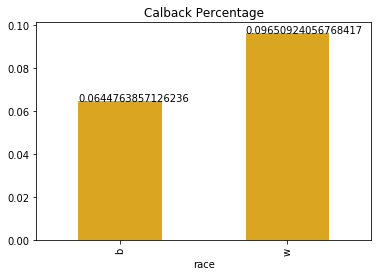

In [146]:
grouped = data.groupby('race')['call'].mean()
grouped.columns = ['avg']
plt.title("Calback Percentage")


ax = grouped.plot(kind='bar', color = 'goldenrod') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))


There is approximately a 6% probability of callbacks for black applicants in the dataset.

There is approximately a 10% probability of callbacks for white applicants in the dataset.


When sample replicates of the dataset are taken, and their means are calculated, it is clear that the above percentages, as a sample, are strongly representative of the population.

sample proportion is:  0.06456221765913758
the margin of error when p-value is 0.05 is +/- :  0.009761201139334796


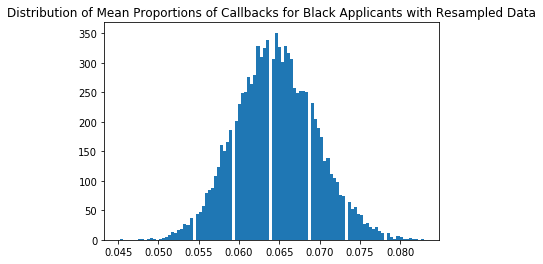

In [152]:
b_array = np.array([True] * 157 + [False] * 2278)
replications = np.array([np.random.choice(b_array, len(b_array), replace = True) for _ in range(10000)])
mean = np.mean(replications, axis=1)
mean = np.sort(mean)
meanofvalues = np.mean(mean)
print ("sample proportion is: ", meanofvalues)
b_margin_of_error = 1.96 * np.sqrt(meanofvalues * (1 - meanofvalues)/ b_n)
print ("the margin of error when p-value is 0.05 is +/- : ", b_margin_of_error)
plt.hist(mean, bins = 100)
plt.title("Distribution of Mean Proportions of Callbacks for Black Applicants with Resampled Data")

sample proportion is:  0.09655605749486654
the margin of error when p-value is 0.05 is +/- :  0.01173132201787648


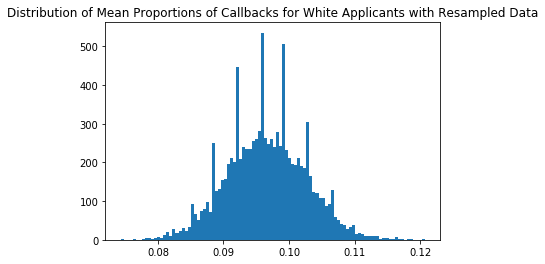

In [157]:

w_array = np.array([True] * 235 + [False] * 2200)
replications = np.array([np.random.choice(w_array, len(w_array), replace = True) for _ in range(10000)])
mean = np.mean(replications, axis=1)
mean = np.sort(mean)
meanofvalues = np.mean(mean)
print ("sample proportion is: ", meanofvalues)
w_margin_of_error = 1.96 * np.sqrt(meanofvalues * (1 - meanofvalues)/ w_n)
print ("the margin of error when p-value is 0.05 is +/- : ", w_margin_of_error)
plt.hist(mean, bins = 100)
plt.title("Distribution of Mean Proportions of Callbacks for White Applicants with Resampled Data")


5. The analysis does *not* show that race is the *most* important factor in influencing callbacks -- it merely shows that race of applicant is correlated with callbacks, but there are other variables to consider as well, which are included in the dataset, but not in the above analysis, namely, education, years of experience, etc.